### 다중 회귀 
- 다중의 독립변수가 있는 회귀 분석
- 여러 개의 독립 변수가 복합적으로 종속 변수에 영향을 미치는 경우 다중 회귀 모형으로 데이터를 표현 할수 있다. 
- 다중 회귀에서 최적 모델을 결정하기 위해 다양한 방법으로 변수를 선택
- 모델이 복잡해지면 과대적합이 발생할 가능성이 있어 이를 방지하고자 다양한 규제를 적용해 모델의 가중치를 제한

### 릿지
- 최소제곱 적합식의 수축 패널티라 불리는 항에 L2 패널티를 추가한 것

1. 매개변수 (Parameters)

- 릿지 회귀는 선형회귀와 비슷하지만, 추가적으로 규제(regularization) 관련 옵션들이 있습니다.
    - alpha (기본값=1.0)
        - 규제 강도. 클수록 계수가 작아지고 과적합 방지 효과 ↑, 하지만 과소적합 위험도 ↑.
        - Ridge의 핵심 매개변수.
    - fit_intercept (기본=True)
        - 절편(bias) 포함 여부.
    - normalize (deprecated)
        - 입력 데이터를 L2-norm으로 나눠 정규화할지 여부. (지금은 StandardScaler 권장)
    - copy_X (기본=True)
        - X를 복사해서 쓸지 여부.
    - max_iter
        - 기본값 = None
        - 반복 최적화할 때 최대 반복 횟수. (데이터 크거나 수치 불안정할 때 필요)
    - tol
        - 기본값 = 0.001 (1e-3)
        - 수렴 판단 기준. 작을수록 정밀, 느려질 수 있음.
        - 작은 값 = 더 정밀, 느림 / 큰 값 = 더 빠름, 덜 정밀
    - solver (기본='auto')
        - 해를 구하는 방법.
        - 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga' 중 선택.
        - 데이터 크기/희소성에 따라 적합한 solver가 달라짐.
    - random_state
        - 확률적 solver(sag, saga 등)에서 난수 제어.

2. 속성 (Attributes)

- fit() 후 모델에 저장되는 값들:
    - coef_
        - 회귀계수 (규제로 인해 선형회귀보다 작은 값).
    - intercept_
        - 절편.
    - n_iter_
        - solver가 반복한 횟수. (확률적 알고리즘일 때만 의미 있음)



| solver         | 특징        | 장점             | 단점      | 권장 상황                    |
| -------------- | --------- | -------------- | ------- | ------------------------ |
| **auto**       | 자동 선택     | 편리             | 제어 불가   | 일반적인 경우                  |
| **svd**        | 특이값 분해    | 안정적, 다중공선성에 강함 | 느림      | 다중공선성 있는 작은/중간 데이터       |
| **cholesky**   | 정규방정식     | 빠름             | 수치적 불안정 | 작은/중간 데이터                |
| **lsqr**       | 반복 최소제곱   | 큰 데이터 처리 가능    | 반복 필요   | 대규모 희소/밀집 데이터            |
| **sparse\_cg** | 공액 기울기법   | 희소 데이터 적합      | 반복 필요   | 대규모 희소 데이터               |
| **sag**        | 확률적 평균 경사 | 대규모 dense 효율적  | 수렴 민감   | n\_samples ≫ n\_features |
| **saga**       | sag 확장    | 희소+L1/L2 지원    | 느릴 수 있음 | 대규모 희소, ElasticNet 가능    |


| Solver         | 접근 방식                                    | 핵심 수식                                                                                                                          | 특징                               |
| -------------- | ---------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ | -------------------------------- |
| **auto**       | 자동 선택                                    | 내부적으로 상황에 맞는 방법 선택                                                                                                             | 작은/중간 데이터는 보통 `cholesky` 사용      |
| **svd**        | 특이값 분해 (SVD)                             | $\hat{\beta} = V (\Sigma^2 + \alpha I)^{-1} \Sigma U^\top y$                                                                   | 수치 안정성 ↑, 다중공선성에 강함, 대규모 데이터엔 느림 |
| **cholesky**   | 정규방정식 직접 풀이                              | $(X^\top X + \alpha I)\beta = X^\top y$                                                                                        | 빠름, 단 수치적 안정성은 `svd`보다 낮음        |
| **lsqr**       | 반복 최소제곱법                                 | $\beta^{(k+1)} = \beta^{(k)} + \Delta \beta$                                                                                   | 대규모/희소 행렬에 적합, Krylov 하위공간 이용    |
| **sparse\_cg** | 공액기울기법 (Conjugate Gradient)              | $\beta^{(k+1)} = \beta^{(k)} + \alpha_k p^{(k)}$<br>$r^{(k+1)} = r^{(k)} - \alpha_k (X^\top X + \alpha I)p^{(k)}$              | 대규모 희소 데이터에서 효율적                 |
| **sag**        | 확률적 평균 경사법 (Stochastic Average Gradient) | $\beta^{(k+1)} = \beta^{(k)} - \eta \Big( \tfrac{1}{n}\sum g_i^{(k)} + \alpha \beta^{(k)} \Big)$                               | n이 큰 dense 데이터에 적합, 빠름           |
| **saga**       | SAG 확장 (ElasticNet 가능)                   | $\beta^{(k+1)} = \beta^{(k)} - \eta \Big( g_i^{(k)} - g_i^{(hist)} + \tfrac{1}{n}\sum g_j^{(hist)} + \alpha \beta^{(k)} \Big)$ | L1/L2 모두 지원, 희소 데이터 적합           |


𝑋
X: 입력 데이터 행렬 (
𝑛
×
𝑝
n×p)

𝑦
y: 타겟 벡터 (
𝑛
×
1
n×1)

𝛽
β: 회귀 계수 (
𝑝
×
1
p×1)

𝛼
α: 규제 강도

In [3]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

In [4]:
## 데이터 로드 
diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

In [5]:
from sklearn.linear_model import Ridge

alpha = np.logspace(-3, 1, 5)

data = []

for i, a in enumerate(alpha):
    ## alpha = 정규화의 강도를 지정
    ridge = Ridge(alpha = a)
    ridge.fit(x, y)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha)
df_ridge.columns = x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


In [6]:
import matplotlib.pyplot as plt

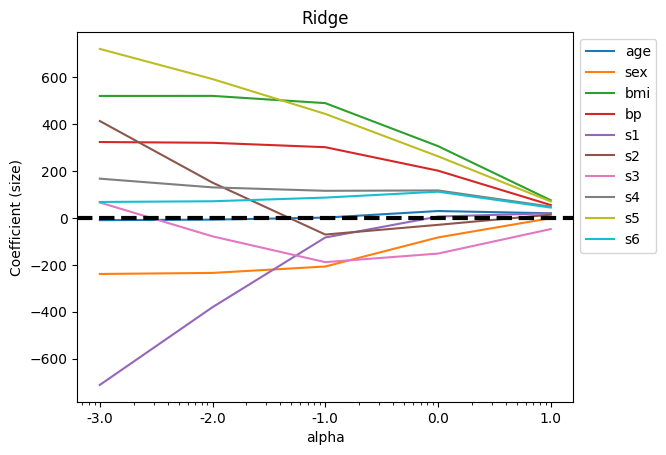

In [7]:
plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1,1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y= 0, linestyle='--', color = 'black', linewidth = 3)
plt.show()

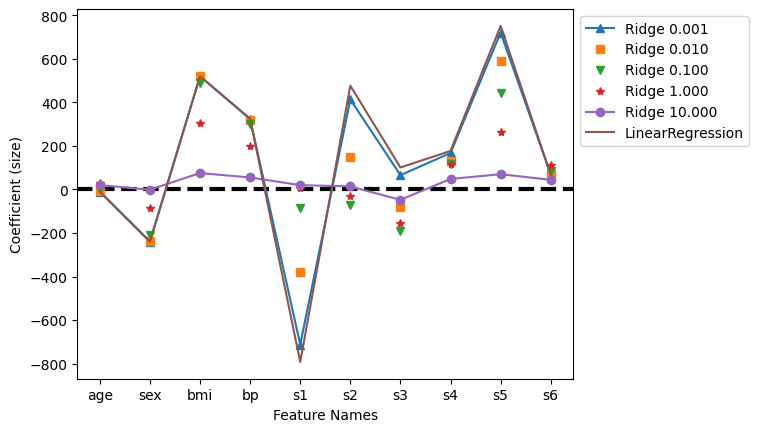

In [9]:
## MSE를 사용한 회귀 모델과 비교
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x, y)

plt.axhline(y= 0, linestyle = '--', color = 'black', linewidth = 3)
plt.plot(df_ridge.loc[0.001], '^-', label = 'Ridge 0.001')
plt.plot(df_ridge.loc[0.010], 's', label = 'Ridge 0.010')
plt.plot(df_ridge.loc[0.100], 'v', label = 'Ridge 0.100')
plt.plot(df_ridge.loc[1.000], '*', label = 'Ridge 1.000')
plt.plot(df_ridge.loc[10.000], 'o-', label = 'Ridge 10.000')
plt.plot(lr.coef_, label='LinearRegression')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.show()

### 라쏘
- 최소 제곱 적합식의 수축 패널티라 불리는 항에 L1 패널치를 추가한 것
- 릿지 회쉬가 변수의 크기가 매우 큰 데이터인 경우 결과를 해석하는데 어려움 발생하는데 이러한 문제점을 해결하기 위한 방법

## ⚙️ 매개변수 (Parameters)

- **`alpha=1.0`**  
  규제 강도. 클수록 많은 계수가 0이 되어 변수 선택 효과 ↑.  
  (너무 크면 과소적합 위험)

- **`fit_intercept=True`**  
  절편을 포함할지 여부.

- **`normalize`** *(deprecated)*  
  입력 특성 정규화 여부. (지금은 `StandardScaler` 권장)

- **`precompute='auto'`**  
  Gram matrix (\(X^\top X\)) 미리 계산 여부.

  Gram matrix (그람 행렬)**은 선형대수에서 자주 쓰이는 개념인데, 회귀 분석에서도 핵심 역할을 합니다.

- **`max_iter=1000`**  
  반복 최적화 최대 횟수. (수렴 안 되면 늘려야 함)

- **`tol=1e-4`**  
  허용 오차(수렴 기준).

- **`selection='cyclic'`**  
  좌표축 경사법(Coordinate Descent) 업데이트 순서.  
  - `'cyclic'`: 순차적으로 업데이트  
  - `'random'`: 무작위 선택

  피쳐의 순서대로 가중치를 적용 시킬것인가 아니면 랜덤하게 적용할 것인가 지정 

- **`warm_start=False`**  
  이전 학습 결과를 이어서 학습할지 여부.

- **`positive=False`**  
  계수를 0 이상으로만 제한할지 여부.

- **`random_state`**  
  `selection='random'`일 때 시드 고정.

---

## 📊 속성 (Attributes)

- **`coef_`**  
  학습된 회귀계수 (일부는 0 → 변수 선택 효과).  

- **`intercept_`**  
  절편.  

- **`n_iter_`**  
  최적화 반복 횟수.  

---

## 🔧 메서드 (Methods)

- **`fit(X, y)`** : 모델 학습  
- **`predict(X)`** : 예측  
- **`score(X, y)`** : 결정계수 \(R^2\) 반환  
- **`set_params(**params)`** : 매개변수 설정  
- **`get_params()`** : 현재 매개변수 확인  

In [10]:
from sklearn.linear_model import Lasso

alpha = np.logspace(-3, 1, 5)

data = []

for i, a in enumerate(alpha):
    lasso = Lasso(alpha = a)
    lasso.fit(x, y)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha)
df_lasso.columns = x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


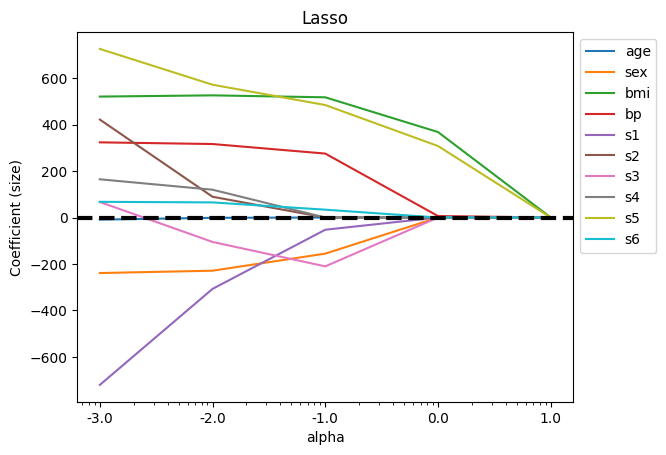

In [11]:
## 알파값이 증가하면서 회귀계수가 0에 도달
## 규제가 강한 라쏘 회귀에서는 bmi, s5 변수만 포함하는 모델이 관찰
## log알파 가 -1에 가까운 경우 bmi, s5, bp, s3, sex, s1 변수가 포함되는 모델이 생성

plt.semilogx(df_lasso)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1,1))
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y= 0, linestyle='--', color='black', linewidth=3)
plt.show()

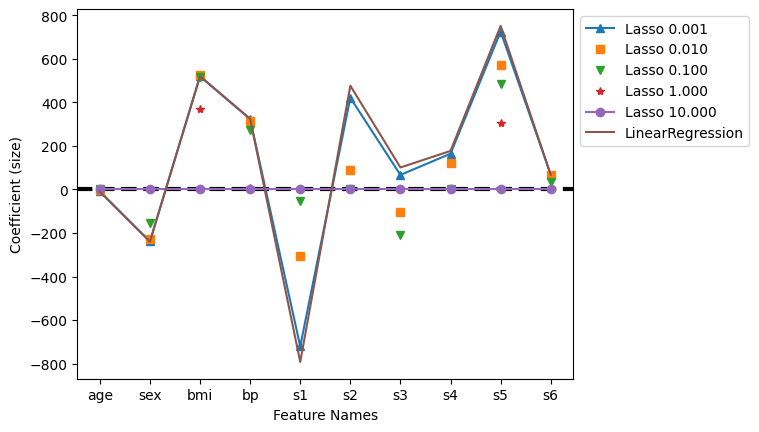

In [12]:
## MSE 회귀 모델과 비교
lr = LinearRegression()
lr.fit(x, y)

plt.axhline(y= 0, linestyle = '--', color = 'black', linewidth = 3)
plt.plot(df_lasso.loc[0.001], '^-', label = 'Lasso 0.001')
plt.plot(df_lasso.loc[0.010], 's', label = 'Lasso 0.010')
plt.plot(df_lasso.loc[0.100], 'v', label = 'Lasso 0.100')
plt.plot(df_lasso.loc[1.000], '*', label = 'Lasso 1.000')
plt.plot(df_lasso.loc[10.000], 'o-', label = 'Lasso 10.000')
plt.plot(lr.coef_, label='LinearRegression')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.show()

### 엘라스틱넷
- 릿지 회귀와 라쏘 회귀를 절충한 알고리즘 
- 수축 패널티는 릿지와 회귀의 규제항을 단순히 더한것, 혼합비율 r을 사용해 조절
- r = 0 이면 릿지회귀, r = 1 라쏘 회귀


## ⚙️ 매개변수 (Parameters)

- **`alpha=1.0`**  
  전체 규제 강도 (클수록 규제가 강해짐).

- **`l1_ratio=0.5`**  
  L1 비중(0~1).  
  - `0` → 순수 릿지  
  - `1` → 순수 라쏘  
  - `(0,1)` → 엘라스틱넷

- **`fit_intercept=True`**  
  절편 포함 여부.

- **`copy_X=True`**  
  입력 X를 내부에서 복사할지 여부.

- **`max_iter=1000`**  
  반복 최적화 최대 횟수(수렴 안 되면 늘리기).

- **`tol=1e-4`**  
  수렴 허용 오차(작을수록 정밀, 느려짐).

- **`selection='cyclic'`**  
  좌표축 경사법에서 계수 업데이트 순서.  
  - `'cyclic'`: 순차 업데이트(기본)  
  - `'random'`: 무작위 업데이트 (`random_state`로 재현성 고정 가능)

- **`warm_start=False`**  
  이전 해를 초기값으로 사용하여 이어서 학습.

- **`positive=False`**  
  계수를 0 이상으로 강제(음수 금지).

- **`precompute=False`**  
  `XᵀX`(Gram matrix) 사전계산 사용 여부 (`'auto'`/`True`/`False`; 버전에 따라 deprecated 가능).

- **`random_state=None`**  
  `selection='random'`일 때 무작위 시드.

> ℹ️ `normalize` 파라미터는 **deprecated/removed**. 전처리는 `StandardScaler`를 `Pipeline`으로 사용 권장.

---

## 📊 속성 (Attributes)

- **`coef_`** : 학습된 회귀계수(일부는 0이 될 수 있음).  
- **`sparse_coef_`** : 희소 형태의 계수(메모리 절약, 버전별 제공).  
- **`intercept_`** : 절편.  
- **`n_iter_`** : 실제 반복 횟수(수렴 확인).  
- **`dual_gap_`** : 최적성 격차(작을수록 수렴에 가까움, 버전별 제공).

---

## 🔧 메서드 (Methods)

- **`fit(X, y)`** : 모델 학습  
- **`predict(X)`** : 예측  
- **`score(X, y)`** : 결정계수 \(R^2\)  
- **`get_params()` / `set_params(**params)`** : 하이퍼파라미터 조회/설정

---

## 🧠 사용 팁

- **라쏘가 과도하게 변수 제거**하거나 **릿지가 과적합을 충분히 억제 못할 때** 중간 타협안으로 효과적.  
- `alpha`는 전체 규제 강도, `l1_ratio`는 L1과 L2의 **믹스 비율**.  
- 대규모/스케일 이질적 데이터는 **표준화(Scaling)** 후 사용.

---

In [13]:
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3, 1, 5)

data = [] 

for i , a in enumerate(alpha):
    ela = ElasticNet(alpha=a, l1_ratio=0.5)
    ela.fit(x, y)
    data.append(pd.Series(np.hstack([ela.coef_])))

df_ela = pd.DataFrame(data, index=alpha)
df_ela.columns = x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


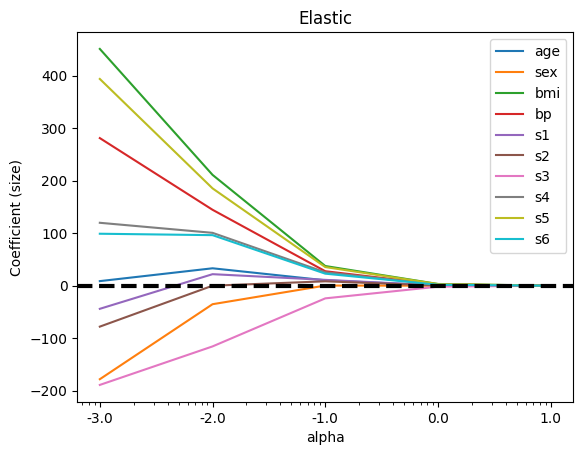

In [14]:
plt.semilogx(df_ela)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1,1))
plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y= 0, linestyle='--', color='black', linewidth=3)
plt.show()

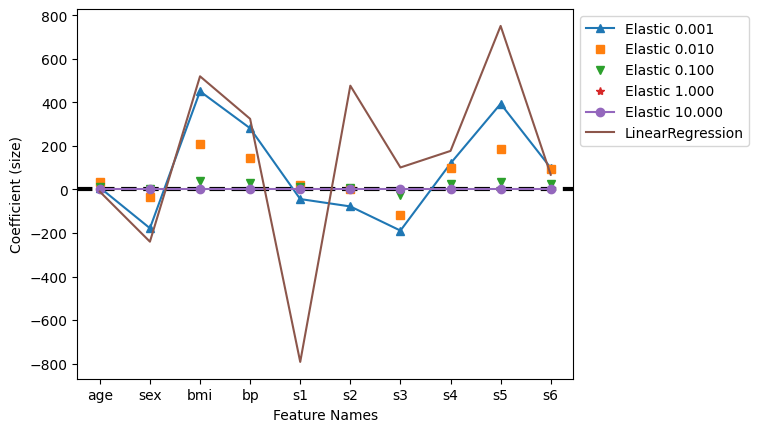

In [15]:
## MSE 회귀 모델과 비교
lr = LinearRegression()
lr.fit(x, y)

plt.axhline(y= 0, linestyle = '--', color = 'black', linewidth = 3)
plt.plot(df_ela.loc[0.001], '^-', label = 'Elastic 0.001')
plt.plot(df_ela.loc[0.010], 's', label = 'Elastic 0.010')
plt.plot(df_ela.loc[0.100], 'v', label = 'Elastic 0.100')
plt.plot(df_ela.loc[1.000], '*', label = 'Elastic 1.000')
plt.plot(df_ela.loc[10.000], 'o-', label = 'Elastic 10.000')
plt.plot(lr.coef_, label='LinearRegression')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.show()